In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import scvelo as scv
import scipy as sc
import seaborn as sns
import os

from matplotlib import pyplot as plt
import temp_package.plot as plot

In [2]:
adata = ad.read('../data/processed/mus_musculus_preprocessed_all_params.h5ad')
c57 = adata.to_df('allele_c57').transpose()
cast = adata.to_df('allele_cast').transpose()

In [3]:
adata.var.columns

Index(['Accession', 'Chromosome', 'End', 'Start', 'Strand', 'sum_allele_c57',
       'sum_allele_cast', 'sum_ratio_allele_c57', 'sum_ratio_allele_cast',
       'ratio_sum_allele_c57', 'ratio_sum_allele_cast',
       'ratio_mean_allele_c57', 'ratio_mean_allele_cast',
       'ratio_std_allele_c57', 'ratio_std_allele_cast', 'allele_p_value',
       'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot',
       'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma',
       'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood',
       'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s',
       'fit_variance', 'fit_alignment_scaling', 'velocity_genes', 'c57_kon',
       'c57_koff', 'c57_ksyn', 'cast_kon', 'cast_koff', 'cast_ksyn',
       'total_kon', 'total_koff', 'total_ksyn', 'spliced_kon', 'spliced_koff',
       'spliced_ksyn', 'unspliced_kon', 'unspliced_koff', 'unspliced_ksyn',
       'total_s_u_kon', 'total_s_u_koff', 'total_s_u_k

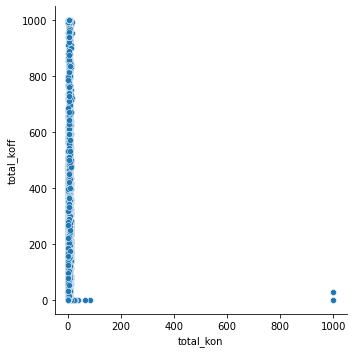

In [4]:
sns.relplot(data=adata.var, x="total_kon", y="total_koff")
plt.savefig('../data/figures/sandberg/kon_vs_koff/Fig_scatterplot_kon_vs_koff_sandberg.pdf')

In [5]:
df = adata.var[(adata.var.total_kon > 800)]

# df = adata.var[(adata.var.total_kon < 800) & (adata.var.total_kon > 25)]

df

,Accession,Chromosome,End,Start,Strand,sum_allele_c57,sum_allele_cast,sum_ratio_allele_c57,sum_ratio_allele_cast,ratio_sum_allele_c57,...,spliced_ksyn,unspliced_kon,unspliced_koff,unspliced_ksyn,total_s_u_kon,total_s_u_koff,total_s_u_ksyn,unspliced_by_total_kon,unspliced_by_total_koff,unspliced_by_total_ksyn
Gene,,,,,,,,,,,,,,,,,,,,,
Fos,ENSMUSG00000021250,12,85477273,85473890,+,20118.0,34691.0,0.367057,0.632943,237.080882,...,2312.990289,0.080219,3.969628,347.903181,0.193442,2.067916,2312.990289,NaN,NaN,NaN
Dnttip2,ENSMUSG00000039756,3,122285269,122274414,+,13942.0,13077.0,0.516007,0.483993,354.478261,...,1470.442534,0.233250,158.339718,1.000000,1.948092,30.366427,1470.442534,0.001,1.361846,159.250228


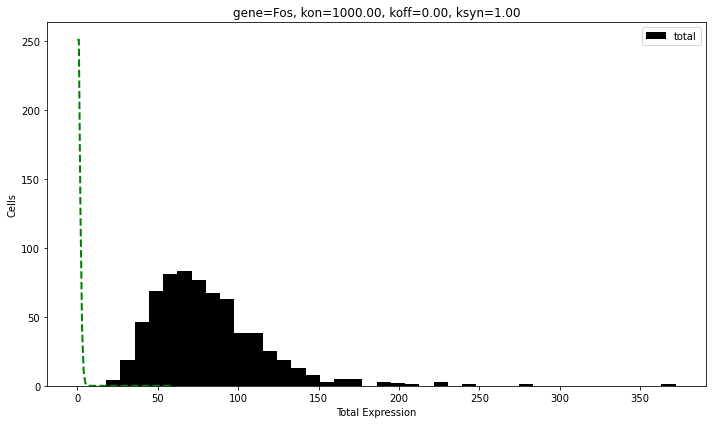

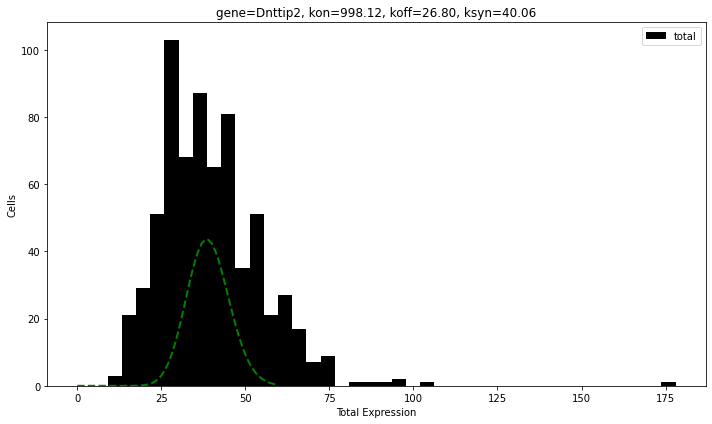

In [6]:
plt.rcParams["figure.figsize"] = (10,6)
for x in df.index:
    gene = x
    kon = df.loc[x].total_kon
    koff = df.loc[x].total_koff
    ksyn = df.loc[x].total_ksyn
    mat_c57 = c57.loc[x][pd.notnull(c57.loc[x])]
    pat_cast = cast.loc[x][pd.notnull(cast.loc[x])]

    save_path = os.path.abspath('../data/figures/sandberg/kon_vs_koff/Fig_binplot_{}_total_sandberg.pdf'.format(gene))
    plot.binplot(x, kon, koff, ksyn, mat_c57+pat_cast, save_path=save_path)


saving figure to file ../data/figures/sandberg/kon_vs_koff/Fig_scatterplot_Fos_total_sandberg.pdf


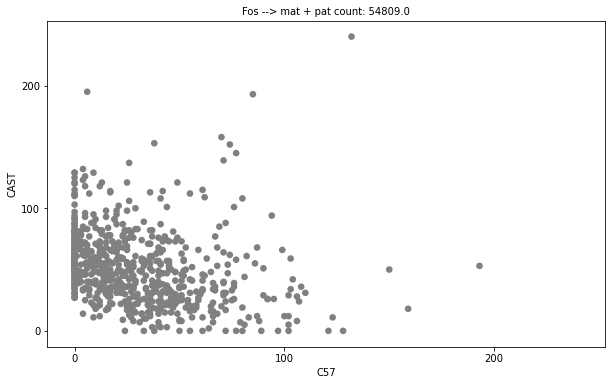

saving figure to file ../data/figures/sandberg/kon_vs_koff/Fig_scatterplot_Dnttip2_total_sandberg.pdf


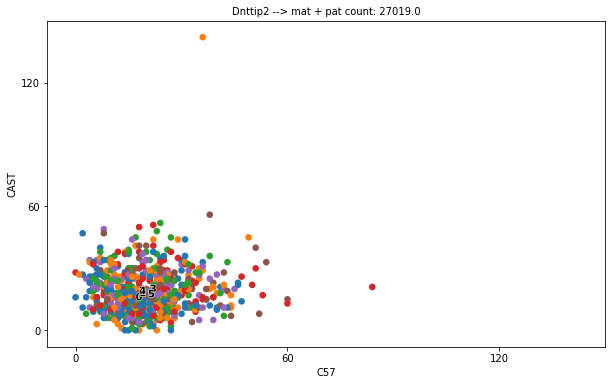

In [7]:
for x in df.index:
    mat_c57 = c57.loc[x][pd.notnull(c57.loc[x])]
    pat_cast = cast.loc[x][pd.notnull(cast.loc[x])]
    
    total_counts = np.sum(mat_c57) + np.sum(pat_cast)
    
    max_c57 = np.max(mat_c57)
    max_cast= np.max(pat_cast)
    max_count = np.max([max_c57, max_cast])
    pad = 1+ int(0.05 * max_count)
    x_lim = (-pad, max_count + pad)
    y_lim = (-pad, max_count + pad)
    
    scv.pl.scatter(adata, x=mat_c57, y=pat_cast, normalize_data= False,
                   xlabel='C57', ylabel='CAST', title=f"{x} --> mat + pat count: {total_counts}",
                   xlim=x_lim, ylim=y_lim, save='../data/figures/sandberg/kon_vs_koff/Fig_scatterplot_{}_total_sandberg.pdf'.format(x))

In [8]:
df2 = adata.var[(adata.var.total_kon < 800) & (adata.var.total_kon > 25)]

df2

,Accession,Chromosome,End,Start,Strand,sum_allele_c57,sum_allele_cast,sum_ratio_allele_c57,sum_ratio_allele_cast,ratio_sum_allele_c57,...,spliced_ksyn,unspliced_kon,unspliced_koff,unspliced_ksyn,total_s_u_kon,total_s_u_koff,total_s_u_ksyn,unspliced_by_total_kon,unspliced_by_total_koff,unspliced_by_total_ksyn
Gene,,,,,,,,,,,,,,,,,,,,,
D1Ertd622e,ENSMUSG00000044768,1,97662074,97643903,-,19406.0,20857.0,0.481981,0.518019,328.922122,...,1653.991412,0.012336,0.699183,116.512507,0.457844,9.072062,1653.991412,NaN,NaN,NaN
Fh1,ENSMUSG00000026526,1,175625635,175600374,-,26282.0,23398.0,0.529026,0.470974,360.001995,...,4578.426391,0.055515,1.811952,173.917190,2.634536,19.973669,4578.426391,0.001,1.362195,13.384392
Ywhaq,ENSMUSG00000076432,12,21417637,21390071,-,21429.0,22267.0,0.490411,0.509589,334.360015,...,11404.307192,0.258050,18.637555,3226.668612,3.970932,14.336889,11404.307192,0.001,1.361946,51.770166
Rbm25,ENSMUSG00000010608,12,83683123,83632234,+,25954.0,27948.0,0.481503,0.518497,329.294007,...,3426.901783,1.901430,8.577662,2392.798463,2.176215,19.052621,3426.901783,NaN,NaN,NaN
Atf4,ENSMUSG00000042406,15,80257540,80255184,+,31244.0,26915.0,0.537217,0.462783,365.778421,...,1.000000,0.160135,2.679532,115.879335,2.525168,0.001000,1.000000,0.001,1.361841,52.141956
Ftsjd1,ENSMUSG00000046441,8,110224489,110217960,+,17595.0,50022.0,0.260216,0.739784,177.320926,...,326.031054,0.001000,0.270624,17.797615,0.138953,1.660708,326.031054,NaN,NaN,NaN


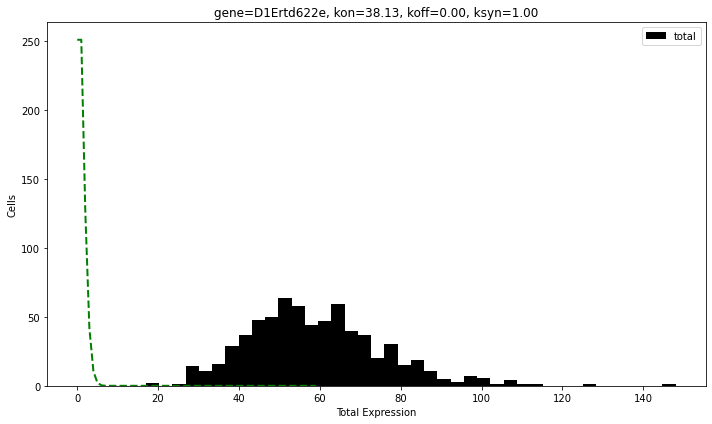

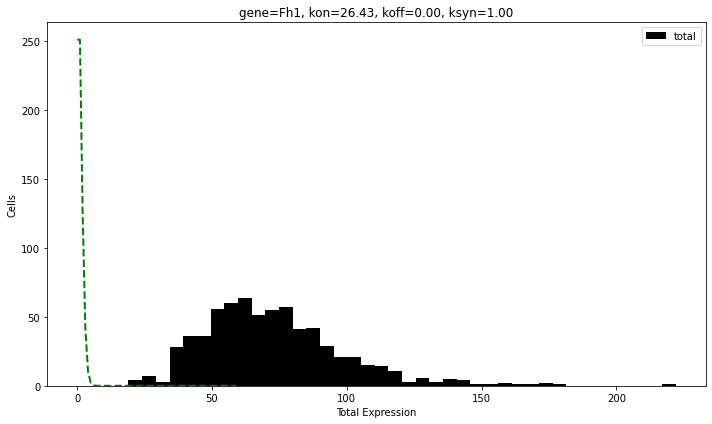

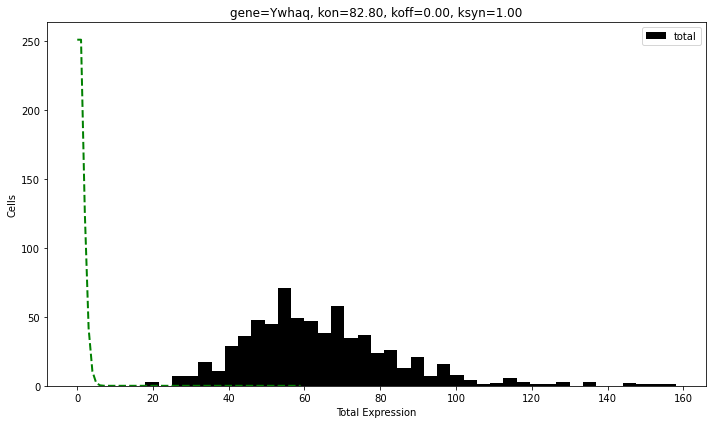

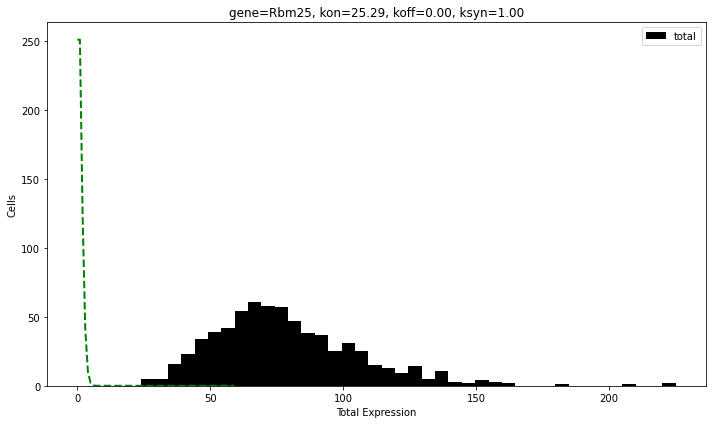

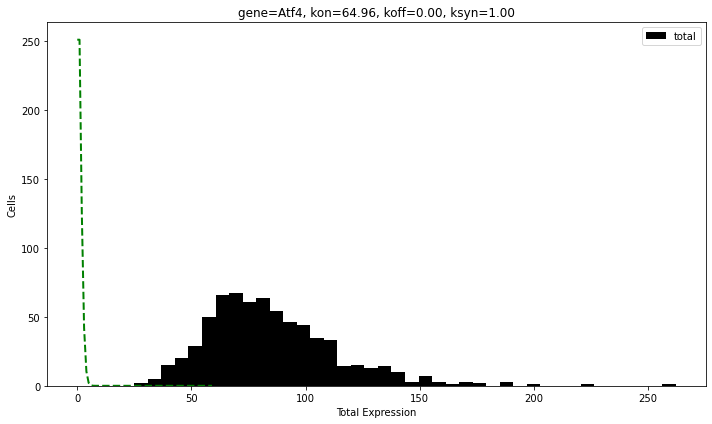

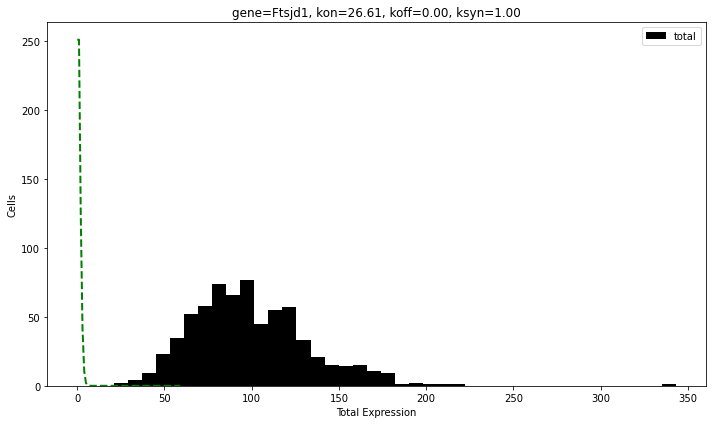

In [9]:
plt.rcParams["figure.figsize"] = (10,6)
for x in df2.index:
    gene = x
    kon = df2.loc[x].total_kon
    koff = df2.loc[x].total_koff
    ksyn = df2.loc[x].total_ksyn
    
    mat_c57 = c57.loc[x][pd.notnull(c57.loc[x])]
    pat_cast = cast.loc[x][pd.notnull(cast.loc[x])]
    
    save_path = os.path.abspath('../data/figures/sandberg/kon_vs_koff/Fig_binplot_{}_total_sandberg.pdf'.format(gene))
    plot.binplot(x, kon, koff, ksyn, mat_c57+pat_cast, save_path=save_path)

saving figure to file ../data/figures/sandberg/kon_vs_koff/Fig_scatterplot_D1Ertd622e_total_sandberg.pdf


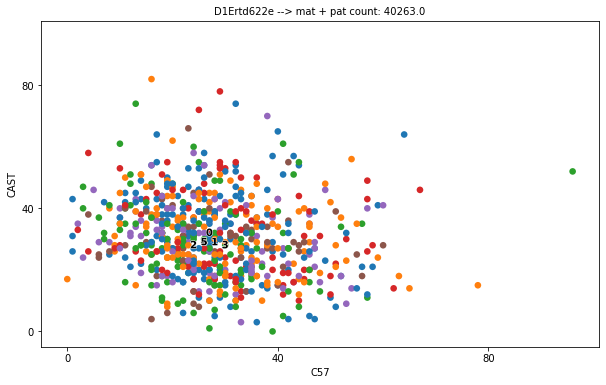

saving figure to file ../data/figures/sandberg/kon_vs_koff/Fig_scatterplot_Fh1_total_sandberg.pdf


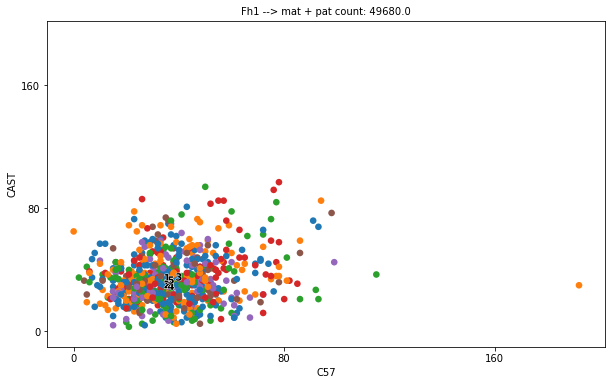

saving figure to file ../data/figures/sandberg/kon_vs_koff/Fig_scatterplot_Ywhaq_total_sandberg.pdf


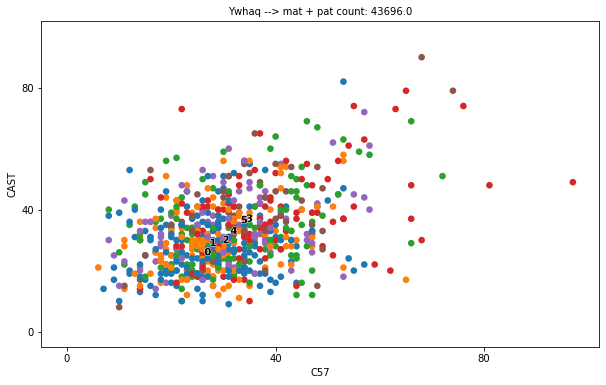

saving figure to file ../data/figures/sandberg/kon_vs_koff/Fig_scatterplot_Rbm25_total_sandberg.pdf


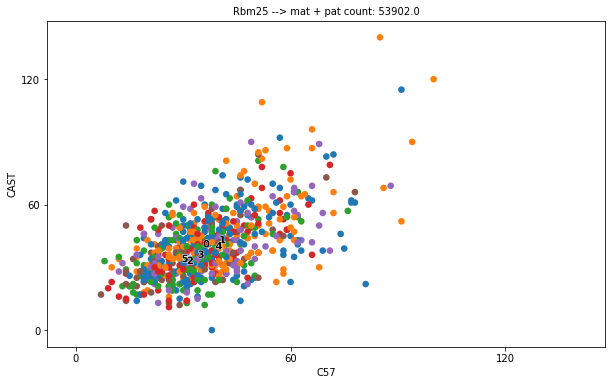

saving figure to file ../data/figures/sandberg/kon_vs_koff/Fig_scatterplot_Atf4_total_sandberg.pdf


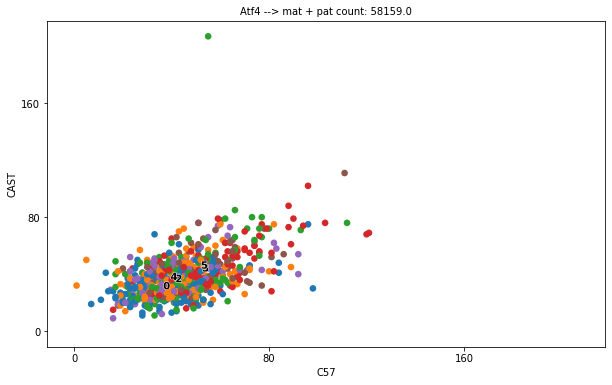

saving figure to file ../data/figures/sandberg/kon_vs_koff/Fig_scatterplot_Ftsjd1_total_sandberg.pdf


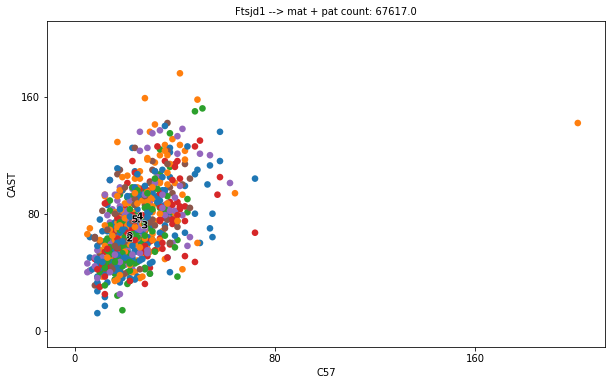

In [10]:
for x in df2.index:
    mat_c57 = c57.loc[x][pd.notnull(c57.loc[x])]
    pat_cast = cast.loc[x][pd.notnull(cast.loc[x])]
    
    total_counts = np.sum(mat_c57) + np.sum(pat_cast)
    
    max_c57 = np.max(mat_c57)
    max_cast= np.max(pat_cast)
    max_count = np.max([max_c57, max_cast])
    pad = 1+ int(0.05 * max_count)
    x_lim = (-pad, max_count + pad)
    y_lim = (-pad, max_count + pad)
    
    scv.pl.scatter(adata, x=mat_c57, y=pat_cast, normalize_data= False,
                   xlabel='C57', ylabel='CAST', title=f"{x} --> mat + pat count: {total_counts}",
                   xlim=x_lim, ylim=y_lim, save='../data/figures/sandberg/kon_vs_koff/Fig_scatterplot_{}_total_sandberg.pdf'.format(x))